# 1 Data Simulation

In [22]:
import numpy as np
import pandas as pd
import neurokit2 as nk

,ECG,RSP,EDA
count,500.000000,500.000000,500.000000
mean,0.265769,0.005175,1.464235
std,0.218766,0.361060,0.284766
min,-0.331077,-0.583871,0.991666
25%,0.124982,-0.340649,1.242952
50%,0.233647,0.005426,1.379977
75%,0.368603,0.354435,1.648018
max,1.184355,0.582315,2.155483


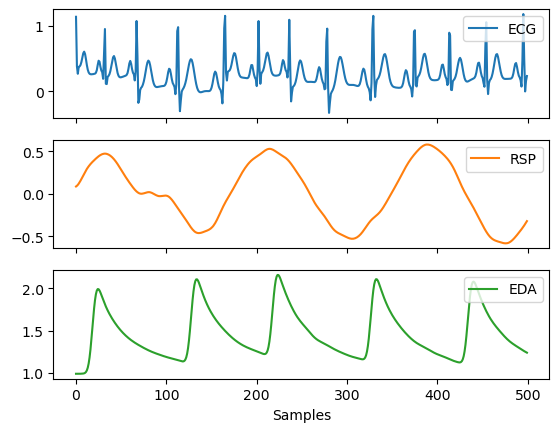

In [65]:
duration = 10
sampling_rate = 50

# Generate synthetic signals
ecg = nk.ecg_simulate(duration=duration, sampling_rate=sampling_rate, 
    heart_rate=70, heart_rate_std=10, noise=0.1)
rsp = nk.rsp_simulate(duration=duration, sampling_rate=sampling_rate,
    respiratory_rate=15, noise=0.03)
eda = nk.eda_simulate(duration=duration, sampling_rate=sampling_rate,
    scr_number=5)

# Visualise biosignals
data = pd.DataFrame({"ECG": ecg,
                     "RSP": rsp,
                     "EDA": eda})
                     
nk.signal_plot(data, subplots=True)
data.describe()

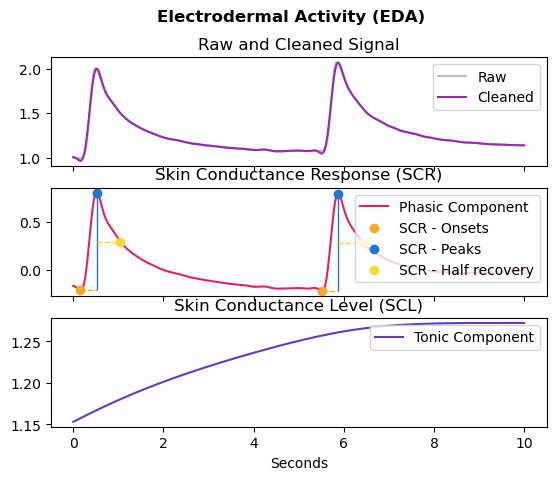

In [24]:
# Generate 10 seconds of EDA signal (recorded at 250 samples / second) with 2 SCR peaks
eda = nk.eda_simulate(duration=10, sampling_rate=250, scr_number=2, drift=0.01)

# Process it
signals, info = nk.eda_process(eda, sampling_rate=250)

# Visualise the processing
nk.eda_plot(signals, sampling_rate=250)